#Load Data


In [8]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/MRI1.csv')
df

,id,age,male,weight,height,bmi,case.id,futime,status
0,1,57,0,60.0,163.0,22.690939,10630.0,6261,0
1,2,67,0,70.4,168.0,24.884028,14817.0,624,0
2,3,53,1,105.8,186.0,30.453537,3.0,1783,0
3,4,56,1,109.3,170.0,37.830100,6628.0,3143,0
4,5,68,1,NaN,NaN,NaN,1871.0,1836,1
...,...,...,...,...,...,...,...,...,...
17544,17562,46,0,53.0,161.0,20.501023,12713.0,1894,0
17545,17563,52,1,111.8,154.0,47.335905,17563.0,3841,0
17546,17564,59,0,57.3,NaN,NaN,16164.0,5081,0
17547,17565,61,0,NaN,NaN,NaN,17276.0,3627,1


#Data Preparation

##Data sepearation

In [10]:
y = df['bmi']
y

,bmi
0,22.690939
1,24.884028
2,30.453537
3,37.830100
4,NaN
...,...
17544,20.501023
17545,47.335905
17546,NaN
17547,NaN


In [11]:
X=df.drop('bmi',axis=1)
X

,id,age,male,weight,height,case.id,futime,status
0,1,57,0,60.0,163.0,10630.0,6261,0
1,2,67,0,70.4,168.0,14817.0,624,0
2,3,53,1,105.8,186.0,3.0,1783,0
3,4,56,1,109.3,170.0,6628.0,3143,0
4,5,68,1,NaN,NaN,1871.0,1836,1
...,...,...,...,...,...,...,...,...
17544,17562,46,0,53.0,161.0,12713.0,1894,0
17545,17563,52,1,111.8,154.0,17563.0,3841,0
17546,17564,59,0,57.3,NaN,16164.0,5081,0
17547,17565,61,0,NaN,NaN,17276.0,3627,1


##Data Spliting

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=100)

In [13]:
X_train

,id,age,male,weight,height,case.id,futime,status
15841,15859,69,1,125.2,188.0,13998.0,2803,0
14496,14511,50,1,95.6,179.0,3304.0,1665,0
7043,7051,48,1,80.0,180.0,8984.0,5106,0
16077,16095,56,1,146.5,184.0,10918.0,1030,0
8176,8186,35,0,NaN,NaN,5212.0,1890,0
...,...,...,...,...,...,...,...,...
16304,16322,79,1,99.3,183.0,16322.0,2028,0
79,80,44,0,75.2,158.0,5466.0,1319,0
12119,12132,60,1,86.1,168.0,12132.0,1790,0
14147,14161,61,1,NaN,NaN,9658.0,3226,0


In [14]:
X_test

,id,age,male,weight,height,case.id,futime,status
10448,10460,34,0,88.3,174.0,15339.0,271,0
17441,17459,45,1,81.4,174.0,8937.0,1352,0
8744,8756,43,0,108.2,166.0,10541.0,5415,0
4296,4302,61,0,NaN,NaN,16319.0,5557,0
9068,9080,76,1,103.2,167.0,11307.0,2037,0
...,...,...,...,...,...,...,...,...
7290,7298,34,0,129.0,168.0,7298.0,2094,0
3845,3851,69,1,108.6,170.0,5693.0,5286,0
3113,3119,53,0,96.4,172.0,3119.0,3176,0
13922,13936,41,0,90.0,160.0,384.0,3426,0


##Removing Nan Values

In [15]:
# Drop NaNs in X_train
X_train = X_train.dropna()

# Ensure y_train has the same indices as X_train
y_train = y_train.loc[X_train.index]

# Repeat the same for X_test if needed
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]


In [16]:
X_test

,id,age,male,weight,height,case.id,futime,status
10448,10460,34,0,88.3,174.0,15339.0,271,0
17441,17459,45,1,81.4,174.0,8937.0,1352,0
8744,8756,43,0,108.2,166.0,10541.0,5415,0
9068,9080,76,1,103.2,167.0,11307.0,2037,0
2414,2419,78,0,93.4,169.0,2419.0,2336,0
...,...,...,...,...,...,...,...,...
7290,7298,34,0,129.0,168.0,7298.0,2094,0
3845,3851,69,1,108.6,170.0,5693.0,5286,0
3113,3119,53,0,96.4,172.0,3119.0,3176,0
13922,13936,41,0,90.0,160.0,384.0,3426,0


In [17]:
X_train

,id,age,male,weight,height,case.id,futime,status
15841,15859,69,1,125.2,188.0,13998.0,2803,0
14496,14511,50,1,95.6,179.0,3304.0,1665,0
7043,7051,48,1,80.0,180.0,8984.0,5106,0
16077,16095,56,1,146.5,184.0,10918.0,1030,0
1951,1955,62,0,77.5,164.0,432.0,5358,0
...,...,...,...,...,...,...,...,...
16734,16752,73,1,82.5,180.0,10083.0,2610,0
16304,16322,79,1,99.3,183.0,16322.0,2028,0
79,80,44,0,75.2,158.0,5466.0,1319,0
12119,12132,60,1,86.1,168.0,12132.0,1790,0


#Model Building

##Linear Regression

###Training Model

In [18]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

###Apply Prediction

In [19]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [20]:
y_lr_train_pred

array([36.88501038, 29.76740194, 23.93412087, ..., 30.25124586,
       30.43555358, 32.03306198])

In [21]:
y_lr_test_pred

array([28.97424139, 26.5788199 , 38.95779908, ..., 32.59326492,
       34.7184921 , 23.98127867])

###Evolution of model


In [22]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)


In [23]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  0.7885700190668912
LR R2 (Train):  0.9841393229169244
LR MSE (Test):  1.0836185894143087
LR R2 (Test):  0.9791870576388196


In [24]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [25]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.78857,0.984139,1.083619,0.979187


##Random Forest

###Training Model

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

###Apply Prediction

In [27]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [28]:
y_rf_train_pred

array([40.66063639, 33.87045156, 28.89820821, ..., 28.89820821,
       28.89820821, 35.04567115])

In [29]:
y_rf_test_pred

array([28.89820821, 28.89820821, 35.04567115, ..., 34.31639376,
       29.12821733, 23.46254501])

###Evolution Of Model

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)


In [31]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,14.503417,0.70829,15.617533,0.700036


##XG Boost Model

###Training Model

In [32]:
from xgboost import XGBRegressor

# Initialize the XGBoost regressor with a maximum depth of 2 and a random seed
xgb = XGBRegressor(max_depth=2, random_state=100)

# Train the model
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=100, ...)

###Apply Prediction

In [33]:
y_xgb_train_pred = xgb.predict(X_train)
y_xgb_test_pred = xgb.predict(X_test)

###Evolution of Model

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

xgb_train_mse = mean_squared_error(y_train, y_xgb_train_pred)
xgb_train_r2 = r2_score(y_train, y_xgb_train_pred)

xgb_test_mse = mean_squared_error(y_test, y_xgb_test_pred)
xgb_test_r2 = r2_score(y_test, y_xgb_test_pred)


In [35]:
xgb_results = pd.DataFrame(['XGBOOST', xgb_train_mse, xgb_train_r2, xgb_test_mse, xgb_test_r2]).transpose()
xgb_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
xgb_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,XGBOOST,0.226583,0.995443,0.280905,0.994605


#Model Compare

In [36]:
df_model = pd.concat([lr_results, rf_results,xgb_results], axis=0).reset_index(drop=True)
df_model

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.78857,0.984139,1.083619,0.979187
1,Random Forest,14.503417,0.70829,15.617533,0.700036
2,XGBOOST,0.226583,0.995443,0.280905,0.994605


##XGBoost appears to be the best performing model overall.

#Data Visulisation

Text(0.5, 0, 'Experimental BMI')

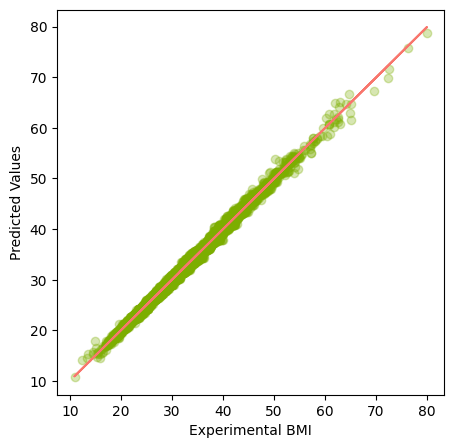

In [37]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,5))
plt.scatter(x=y_train,y=y_xgb_train_pred,c="#7CAE00", alpha=0.3)

z=np.polyfit(y_train,y_xgb_train_pred,1)
p=np.poly1d(z)

plt.plot(y_train,p(y_train),'#F8766D')
plt.ylabel('Predicted Values')
plt.xlabel('Experimental BMI')

In [38]:
import pickle

# Save the XGBoost model as model.pkl
with open('model.pkl', 'wb') as file:
    pickle.dump(xgb, file)  # Save the 'xgb' model object

print("Model saved successfully as model.pkl")

Model saved successfully as model.pkl
